# Simulations 

Scott Cohn

Apr 2020

Stat 535

In [2]:
import os
import sys
import random

sys.path.insert(0, 'stat535/lib/')

from Game import *
from sim_funcs import *

## Hypothesis 1

A small initial Gini will lead to a bifurcation of wealth.

In [2]:
# set seed

random.seed(535)

In [3]:
# init game with small Gini

numAgents = 100
mu = 10 
giniArr = [0.1, 0.3, 0.5]
numSims = 25

In [4]:
# create game instance `g`

g0 = Game(numAgent = numAgents, Gini = giniArr[0], para = 2) # Gini = 0.1
g1 = Game(numAgent = numAgents, Gini = giniArr[1], para = 2) # Gini = 0.3

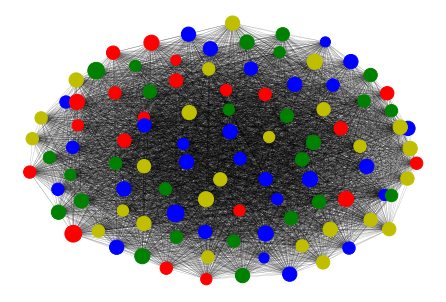

In [105]:
# visualize full connected graph
# nx.draw(g0.network)
# nx.draw(g1.network) 

g0.toImage()

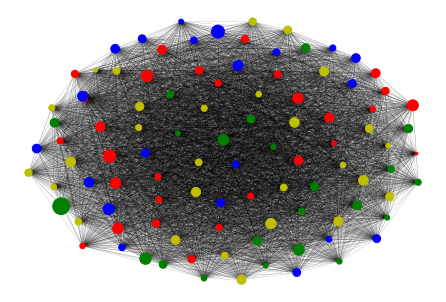

In [6]:
g1.toImage()
plt.savefig("g_init.pdf", transparent = True)

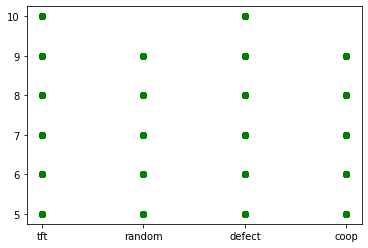

In [6]:
strat_plot(g0, numAgents, 0)

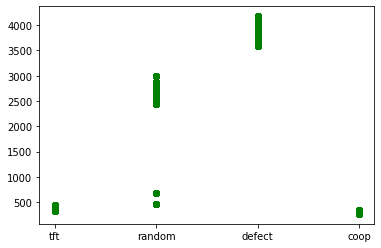

In [7]:
strat_plot(g0, numAgents, numSims)

Cooperate: 22 Defect: 22 Random: 25 TFT: 31


<BarContainer object of 4 artists>

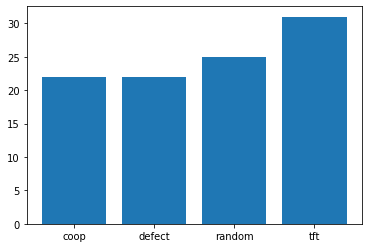

In [67]:
# strategy distro g0
strat_distribution(g0, numAgents)

Cooperate: 21 Defect: 28 Random: 29 TFT: 22


<BarContainer object of 4 artists>

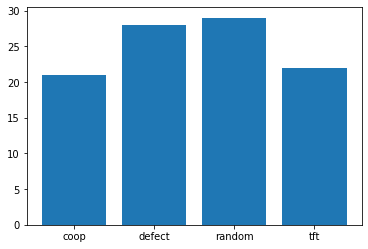

In [68]:
# strategy_dsitribution g1
strat_distribution(g1, numAgents)

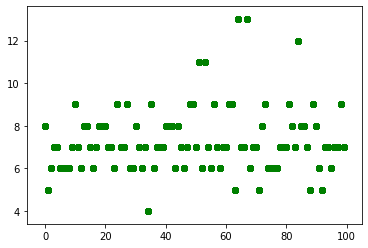

In [69]:
# Initial wealth distribution at time 0 for gini = 0.1
y = g0.wealth_distr(0, '') 
# change '' to '[strat]' to see distro by strategy

for _ in y:
    plt.scatter(range(len(y)), y, c = 'g')

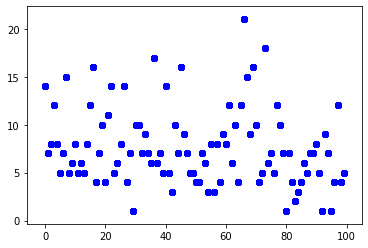

In [70]:
# Initial wealth distribution at time 0 for gini = 0.3
y = g1.wealth_distr(0, '') 
# change '' to '[strat]' to see distro by strategy

for _ in y:
    plt.scatter(range(len(y)), y, c = 'b')

In [7]:
# run sims for each game instance
sim(g0, numSims)
sim(g1, numSims)

In [6]:
g0_df = game_df(g0, numAgents)

g0_df.head()

,id,strategies,a_0,a_1,a_2,a_3,a_4,a_5,a_6,a_7,...,a_16,a_17,a_18,a_19,a_20,a_21,a_22,a_23,a_24,a_25
0,0,coop,6,258,298,314,322,326,326,330,...,334,334,334,334,334,334,334,334,334,334
1,1,coop,8,276,292,304,304,304,308,312,...,316,316,316,316,316,316,316,316,316,316
2,2,tft,7,247,329,361,371,377,383,383,...,383,383,383,383,383,383,383,383,383,383
3,3,tft,6,278,320,338,350,358,364,368,...,376,376,376,376,376,376,376,376,376,376
4,4,random,8,342,524,670,804,918,1006,1122,...,1896,1964,2048,2122,2198,2274,2350,2422,2492,2570


In [7]:
g1_df = game_df(g1, numAgents)

g1_df.head()

,id,strategies,a_0,a_1,a_2,a_3,a_4,a_5,a_6,a_7,...,a_16,a_17,a_18,a_19,a_20,a_21,a_22,a_23,a_24,a_25
0,0,random,5,341,553,675,801,891,983,1081,...,1857,1931,2015,2093,2185,2269,2355,2425,2483,2545
1,1,coop,4,244,280,288,288,292,296,300,...,300,300,300,300,300,300,300,300,300,300
2,2,tft,5,229,309,351,379,399,411,411,...,417,417,417,417,417,417,417,417,417,417
3,3,tft,18,246,304,324,340,346,348,350,...,350,350,350,350,350,350,350,350,350,350
4,4,random,20,356,542,684,802,922,1006,1094,...,1974,2054,2158,2252,2362,2466,2568,2648,2720,2818


In [8]:
# write df to csv
g0_df.to_csv('g1.csv', header=True, index=False) 
g1_df.to_csv('g3.csv', header=True, index=False) 

In [95]:
wealth_memo_g0 = []
wealth_memo_g1 = []
for i in range(numSims):
    wealth_memo_g0.append(g0.wealth_distr(i))
    wealth_memo_g1.append(g1.wealth_distr(i))

In [96]:
# Take wealth array/round and convert to np array
w0 = np.array(wealth_memo_g0)
w1 = np.array(wealth_memo_g1)

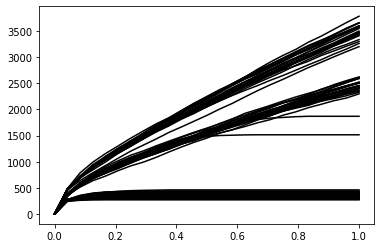

In [97]:
x = np.linspace(0,1,numSims)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, w0, color = 'k')

plt.show()

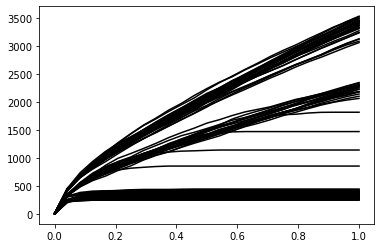

In [98]:
x = np.linspace(0,1,numSims)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, w1, color = 'k')

plt.show()

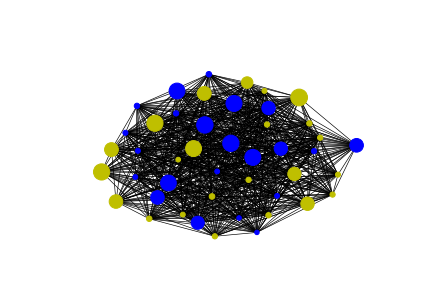

In [100]:
g0.toImage()

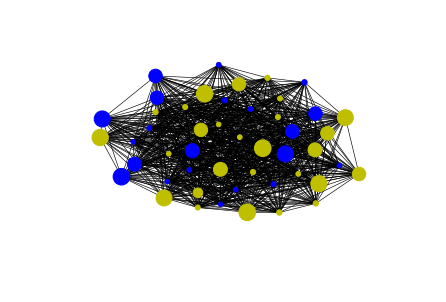

In [8]:
g1.toImage()
plt.savefig("g_fin.pdf", transparent = True)

Visually, hypothesis seems to hold. Extreme separation in wealth distribution over time.